In [96]:
# import libraries
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


## Loading data 

In [97]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [98]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


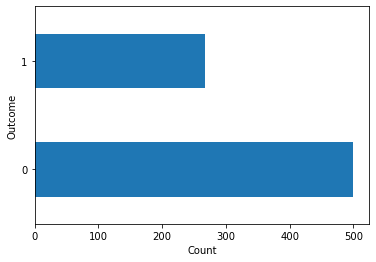

In [99]:
#plot graph to check outcome situation
data['Outcome'].value_counts().plot(kind = "barh")
plt.xlabel("Count")
plt.ylabel("Outcome")
plt.show()

In [100]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


## Train data ( split train and test sets)

In [101]:
X = data.drop('Outcome', axis = 1)
Y = data['Outcome']

In [102]:
#train data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, stratify = Y, random_state = 1)

## Class - Perceptron


In [103]:
X_train = X_train.values
X_test = X_test.values

In [104]:
## Perceptron 

def activation_func(x):
    return np.where(x > 0 , 1, 0)

In [105]:
class Perceptron:

    #constructor
    def __init__(self, learning_rate = 0.01, n_iters = 10000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = activation_func
        self.weights = None
        self.bias = None


    # Trainging data    
    def fit(self, X, y):
        
        # numbers of samples and features from training data
        n_samples, n_features = X.shape

        # initial parameters - weights and bias
        self.w = np.zeros(n_features)
        self.b = 0

        y_act = np.where(y > 0 , 1, 0)

        # Mathematical equation - Linear Model/ learn weights
        for a in range(self.n_iters):
            for idx, x_i in enumerate(X):
                f_output = np.dot(x_i, self.w) + self.b
                y_hat = self.activation_func(f_output)

                # Perceptron update rule
                update = self.lr * (y_act[idx] - y_hat)
                self.w += update * x_i
                self.b += update

    # Test data
    def predict(self, X):
        output = np.dot(X, self.w) + self.b
        y_hat = self.activation_func(output)
        return y_hat

In [106]:
    def accuracy(y_true, y_predict):
        accuracy = np.sum(y_true == y_predict) / len(y_true)
        return accuracy 

In [107]:
p = Perceptron(learning_rate = 0.01, n_iters = 10000)
p.fit(X_train, Y_train)
predictions = p.predict(X_test)


In [108]:
print("Perceptron accuracy: ", accuracy(Y_test, predictions))

Perceptron accuracy:  0.6883116883116883


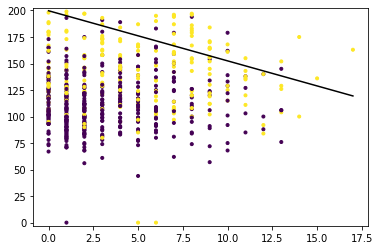

In [109]:
# plot decision bundary 

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], marker = ".", c = Y_train)

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = (-p.w[0] * x0_1 - p.b) / p.w[1]
x1_2 = (-p.w[0] * x0_2 - p.b) / p.w[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])

plt.show()